In [13]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy   as np
import matplotlib.cm as cm
from scipy import stats
from ArcticTools import map
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import glob
sns.set_style("whitegrid")
%matplotlib inline

In [14]:
nav_lat= nc.Dataset('/ocean/xiaoxiny/research/data/isobath_factor.nc').variables['nav_lat'][:]
nav_lon= nc.Dataset('/ocean/xiaoxiny/research/data/isobath_factor.nc').variables['nav_lon'][:]
e3t= nc.Dataset('/ocean/xiaoxiny/research/data/mesh_mask_anha4_201509.nc').variables['e3t_0'][0,:]

In [15]:
nc.Dataset('/ocean/xiaoxiny/research/data/mesh_mask_anha4_201509.nc').variables.keys()

odict_keys(['nav_lon', 'nav_lat', 'nav_lev', 'time_counter', 'tmask', 'umask', 'vmask', 'fmask', 'tmaskutil', 'umaskutil', 'vmaskutil', 'fmaskutil', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f', 'ff', 'mbathy', 'e3t', 'e3u', 'e3v', 'e3w', 'gdept', 'gdepu', 'gdepv', 'gdepw', 'gdept_0', 'gdepw_0', 'e3t_0', 'e3w_0'])

In [16]:
dz= nc.Dataset('/ocean/xiaoxiny/research/data/mesh_mask_anha4_201509.nc').variables['gdept_0'][0,:]
dz.shape

(50,)

In [17]:
bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
nemolon=bathy.variables['nav_lon'][400:,:]
nemolat=bathy.variables['nav_lat'][400:,:]
bathy=bathy.variables['Bathymetry'][400:,:]

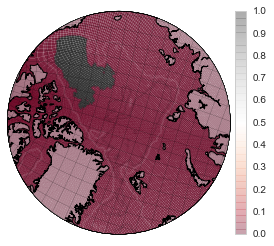

In [18]:
m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l',round="True")
n_lon,n_lat = m(nemolon,nemolat)
m.plot(n_lon[::20,::20],n_lat[::20,::20],n_lon[::20,::20].T,n_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)

# shade coastal/internal ocean
pbathy = np.zeros_like(bathy)

for tempx in range(len(pbathy[0,:])):
   for tempy in range(len(pbathy[:,0])):

    # step 2: using bathy to do the basic calculation
     if bathy[tempy,tempx]>=3000:
        pbathy[tempy,tempx] = 1
     
    # step 1: using imaginary lines to exclude AR from a shallow water region
    # line1 <3000 = nan
     if (35*tempx -8120 > tempy) and bathy[tempy,tempx] < 3000:
                pbathy[tempy,tempx] = np.nan
    # line2 up and < 3000 = 0 
     if (-21/69*tempx+353.04<tempy) and bathy[tempy,tempx] < 3000:
                pbathy[tempy,tempx] = 0                      
    # line3 right hand side = nan           
     if(2.69*tempx -497.16 > tempy):
            pbathy[tempy,tempx] = np.nan
     if (nemolon[tempy,tempx]>=-180) and(nemolon[tempy,tempx]<-170)and bathy[tempy,tempx]<1500:
        pbathy[tempy,tempx] = np.nan  
        
    # step 3: N sea
     if (nemolon[tempy,tempx]<-60) and(nemolon[tempy,tempx]>-100) and nemolat[tempy,tempx]<80:
         pbathy[tempy,tempx] = np.nan  
    
# step 4: remove outside of CB
latind = (nemolon<180)&(nemolon>-100)
pbathy[(bathy < 500)|latind] = np.nan  
latind = (nemolon<-175) & (bathy < 3000)
pbathy[(bathy < 500)|latind] = np.nan 
latind = (nemolon>-115) & (bathy < 3000)
pbathy[latind] = np.nan 

# convert to 1/0
shallow=-(pbathy-1)
deep3 = pbathy
ind = (deep3!=1);deep3[ind]=0
ind = (shallow!=1);shallow[ind]=0

# visualize 
m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l',round="True")
m.pcolor(n_lon,n_lat, np.ma.masked_invalid(deep3), cmap = 'RdGy',alpha = 0.2)
m.colorbar()
m.contour(n_lon,n_lat,bathy,[1000,3000],alpha=0.1)
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
plt.show()

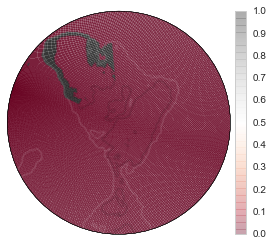

In [19]:
m.pcolor(n_lon,n_lat, np.ma.masked_invalid(shallow), cmap = 'RdGy',alpha = 0.2)
m.colorbar()
m.contour(n_lon,n_lat,bathy,[1000,3000],alpha=0.1)

In [21]:
#save in npy file
#np.save("deep", deep3)
#np.save("shallow", shallow)

In [20]:
# dz
dz[31]-dz[30]

87.151163573011331